In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv (r"results.csv", encoding= 'unicode_escape')

In [2]:
results = results.dropna()

In [3]:
results = results.drop(['HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'], axis=1)

In [4]:
results.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H


In [5]:
results = results.rename(columns={'DateTime': 'Date'})

In [6]:
# defining dict for seasons and assign keys
seasons = {}
seasons = results["Season"].unique()
seasons

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21', '2021-22'], dtype=object)

In [7]:
for i in seasons:
    print(len(results[results['Season'] == i]))

380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
70


In [8]:
results = results[results.Season != "2021-22"]

In [9]:
seasons = results["Season"].unique()
seasons

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21'], dtype=object)

In [10]:
results.tail()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H
10803,2020-21,2021-05-23T16:00:00Z,Wolves,Man United,1,2,A


In [11]:
results.shape

(7980, 7)

In [12]:
len(seasons)

21

In [13]:
# assigning value to each key in the seasons dict
for i in range(len(seasons)):
    seasons[i] = pd.DataFrame(results[results['Season'] == seasons[i]])

seasons

array([       Season                  Date       HomeTeam       AwayTeam  FTHG  FTAG  \
       2824  2000-01  2000-08-19T00:00:00Z       Charlton       Man City     4     0
       2825  2000-01  2000-08-19T00:00:00Z        Chelsea       West Ham     4     2
       2826  2000-01  2000-08-19T00:00:00Z       Coventry  Middlesbrough     1     3
       2827  2000-01  2000-08-19T00:00:00Z          Derby    Southampton     2     2
       2828  2000-01  2000-08-19T00:00:00Z          Leeds        Everton     2     0
       ...       ...                   ...            ...            ...   ...   ...
       3199  2000-01  2001-05-19T00:00:00Z       Man City        Chelsea     1     2
       3200  2000-01  2001-05-19T00:00:00Z  Middlesbrough       West Ham     2     1
       3201  2000-01  2001-05-19T00:00:00Z      Newcastle    Aston Villa     3     0
       3202  2000-01  2001-05-19T00:00:00Z    Southampton        Arsenal     3     2
       3203  2000-01  2001-05-19T00:00:00Z      Tottenham     

In [14]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)

     # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

In [15]:
# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)

     # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

In [16]:
def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HTGS'] = HTGS #HomeTeam Goals Scored
    playing_stat['ATGS'] = ATGS #AwayTeam Goals Scored
    playing_stat['HTGC'] = HTGC #HomeTeam Goals Conceded
    playing_stat['ATGC'] = ATGC #AwayTeam Goals Conceded
    
    return playing_stat

In [17]:
for i in range(len(seasons)):
    get_gss(seasons[i])

In [18]:
seasons[15]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
8524,2015-16,2015-08-08T00:00:00Z,Bournemouth,Aston Villa,0,1,A,0,0,0,0
8525,2015-16,2015-08-08T00:00:00Z,Chelsea,Swansea,2,2,D,0,0,0,0
8526,2015-16,2015-08-08T00:00:00Z,Everton,Watford,2,2,D,0,0,0,0
8527,2015-16,2015-08-08T00:00:00Z,Leicester,Sunderland,4,2,H,0,0,0,0
8528,2015-16,2015-08-08T00:00:00Z,Man United,Tottenham,1,0,H,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8899,2015-16,2016-05-15T00:00:00Z,Stoke,West Ham,2,1,H,39,64,54,49
8900,2015-16,2016-05-15T00:00:00Z,Swansea,Man City,1,1,D,41,70,51,40
8901,2015-16,2016-05-15T00:00:00Z,Watford,Sunderland,2,2,D,38,46,48,60
8902,2015-16,2016-05-15T00:00:00Z,West Brom,Liverpool,1,1,D,33,62,47,49


In [19]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points

In [20]:
def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

In [21]:
def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = [] #HomeTeam Total Point
    ATP = [] #AwayTeam Total Point
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

In [22]:
for i in range(len(seasons)):
    get_agg_points(seasons[i])

In [23]:
seasons[20]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
10424,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0,0,0,0,0,0
10425,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,0,0,0,0,0,0
10426,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,0,0,0,0,0,0
10427,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0,0,0,0,0,0
10428,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,66,41,42,64,66,44
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,78,47,32,43,83,59
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,19,33,63,54,20,39
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,59,47,47,65,62,43


In [24]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

In [25]:
def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent

        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat

In [26]:
def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    

In [27]:
for i in range(len(seasons)):
    add_form_df(seasons[i])

In [28]:
seasons[20]

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
10424,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A,0,0,0,...,M,M,M,M,M,M,M,M,M,M
10425,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H,0,0,0,...,M,M,M,M,M,M,M,M,M,M
10426,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H,0,0,0,...,M,M,M,M,M,M,M,M,M,M
10427,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A,0,0,0,...,M,M,M,M,M,M,M,M,M,M
10428,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A,0,0,0,...,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,66,41,42,...,W,L,W,W,W,L,W,W,D,L
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,78,47,32,...,L,W,W,L,L,D,W,W,W,L
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,19,33,63,...,L,L,W,L,L,W,L,L,W,W
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,59,47,47,...,W,L,D,W,L,W,W,L,L,D


In [29]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

In [30]:
for i in range(len(seasons)):
    seasons[i] = seasons[i][cols]

In [31]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

In [32]:
for i in range(len(seasons)):
    seasons[i] = get_mw(seasons[i])

In [33]:
final_df = pd.concat(seasons)

In [34]:
final_df.shape

(7980, 23)

In [35]:
final_df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW'],
      dtype='object')

In [36]:
# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

In [37]:
final_df['HTFormPtsStr'] = final_df['HM1'] + final_df['HM2'] + final_df['HM3'] + final_df['HM4'] + final_df['HM5']
final_df['ATFormPtsStr'] = final_df['AM1'] + final_df['AM2'] + final_df['AM3'] + final_df['AM4'] + final_df['AM5']

final_df['HTFormPts'] = final_df['HTFormPtsStr'].apply(get_form_points)
final_df['ATFormPts'] = final_df['ATFormPtsStr'].apply(get_form_points)

In [38]:
# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0

def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

In [39]:
final_df['HTWinStreak3'] = final_df['HTFormPtsStr'].apply(get_3game_ws)
final_df['HTWinStreak5'] = final_df['HTFormPtsStr'].apply(get_5game_ws)
final_df['HTLossStreak3'] = final_df['HTFormPtsStr'].apply(get_3game_ls)
final_df['HTLossStreak5'] = final_df['HTFormPtsStr'].apply(get_5game_ls)

final_df['ATWinStreak3'] = final_df['ATFormPtsStr'].apply(get_3game_ws)
final_df['ATWinStreak5'] = final_df['ATFormPtsStr'].apply(get_5game_ws)
final_df['ATLossStreak3'] = final_df['ATFormPtsStr'].apply(get_3game_ls)
final_df['ATLossStreak5'] = final_df['ATFormPtsStr'].apply(get_5game_ls)

final_df.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [40]:
# Get Goal Difference
final_df['HTGD'] = final_df['HTGS'] - final_df['HTGC']
final_df['ATGD'] = final_df['ATGS'] - final_df['ATGC']

# Diff in points
final_df['DiffPts'] = final_df['HTP'] - final_df['ATP']
final_df['DiffFormPts'] = final_df['HTFormPts'] - final_df['ATFormPts']

In [41]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
final_df.MW = final_df.MW.astype(float)

for col in cols:
    final_df[col] = final_df[col] / final_df.MW

In [42]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
final_df['FTR'] = final_df.FTR.apply(only_hw)

In [43]:
final_df.shape

(7980, 39)

In [44]:
# Amount of Training Data / rows
7980*2/3

5320.0

In [45]:
final_df_test = final_df[5320:]

In [46]:
final_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
2824,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2825,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2826,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2827,2000-08-19T00:00:00Z,Derby,Southampton,2,2,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2828,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,66,41,42,64,...,0,0,0,0,0,0,0.631579,-0.605263,0.578947,0.184211
10800,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,78,47,32,43,...,0,0,0,0,0,0,1.210526,0.105263,0.631579,0.052632
10801,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,19,33,63,54,...,0,0,0,0,0,0,-1.157895,-0.552632,-0.500000,0.000000
10802,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,59,47,47,65,...,0,0,0,0,0,0,0.315789,-0.473684,0.500000,0.000000


In [47]:
final_df_test

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
8144,2014-08-16T00:00:00Z,Arsenal,Crystal Palace,2,1,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
8145,2014-08-16T00:00:00Z,Leicester,Everton,2,2,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
8146,2014-08-16T00:00:00Z,Man United,Swansea,1,2,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
8147,2014-08-16T00:00:00Z,QPR,Hull,0,1,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
8148,2014-08-16T00:00:00Z,Stoke,Aston Villa,0,1,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,66,41,42,64,...,0,0,0,0,0,0,0.631579,-0.605263,0.578947,0.184211
10800,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,78,47,32,43,...,0,0,0,0,0,0,1.210526,0.105263,0.631579,0.052632
10801,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,19,33,63,54,...,0,0,0,0,0,0,-1.157895,-0.552632,-0.500000,0.000000
10802,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,59,47,47,65,...,0,0,0,0,0,0,0.315789,-0.473684,0.500000,0.000000


<AxesSubplot:>

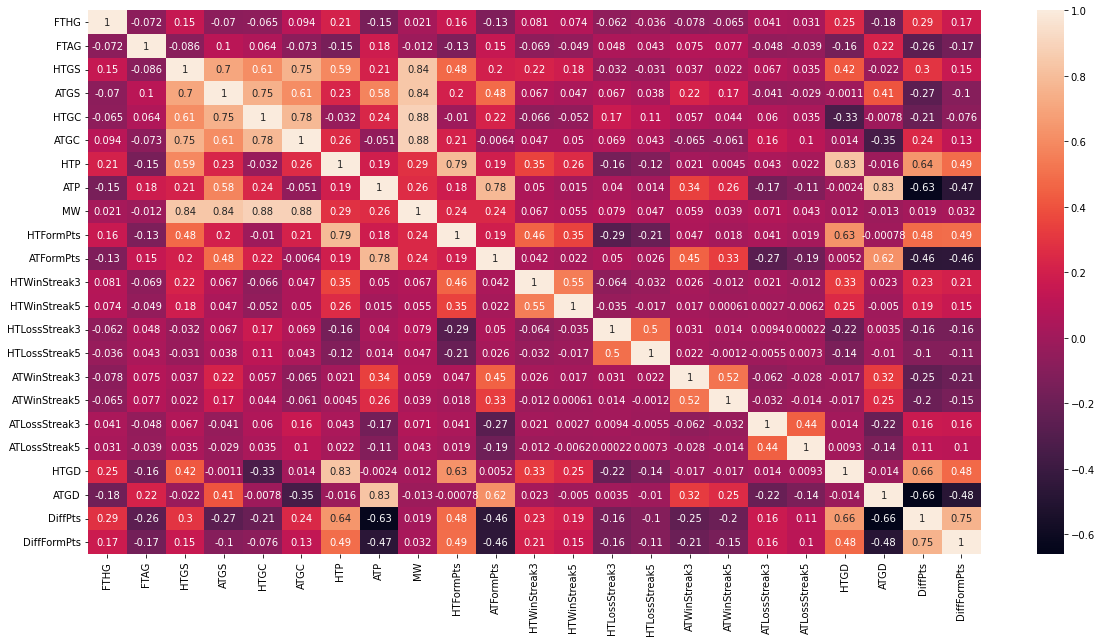

In [56]:
import seaborn as sns 

plt.figure(figsize=(20,10)) 
sns.heatmap(final_df.corr(), annot= True)

In [61]:
final_df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPts'],
      dtype='object')

In [62]:
final_df2 = final_df.copy().drop(columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'])

In [64]:
final_df2.keys()

Index(['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD',
       'ATGD', 'DiffFormPts'],
      dtype='object')

In [65]:
final_df2.head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
2824,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2825,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2826,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2827,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2828,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


array([[<AxesSubplot:xlabel='HTGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='ATGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTP'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATP'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATP'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATP'>,
     

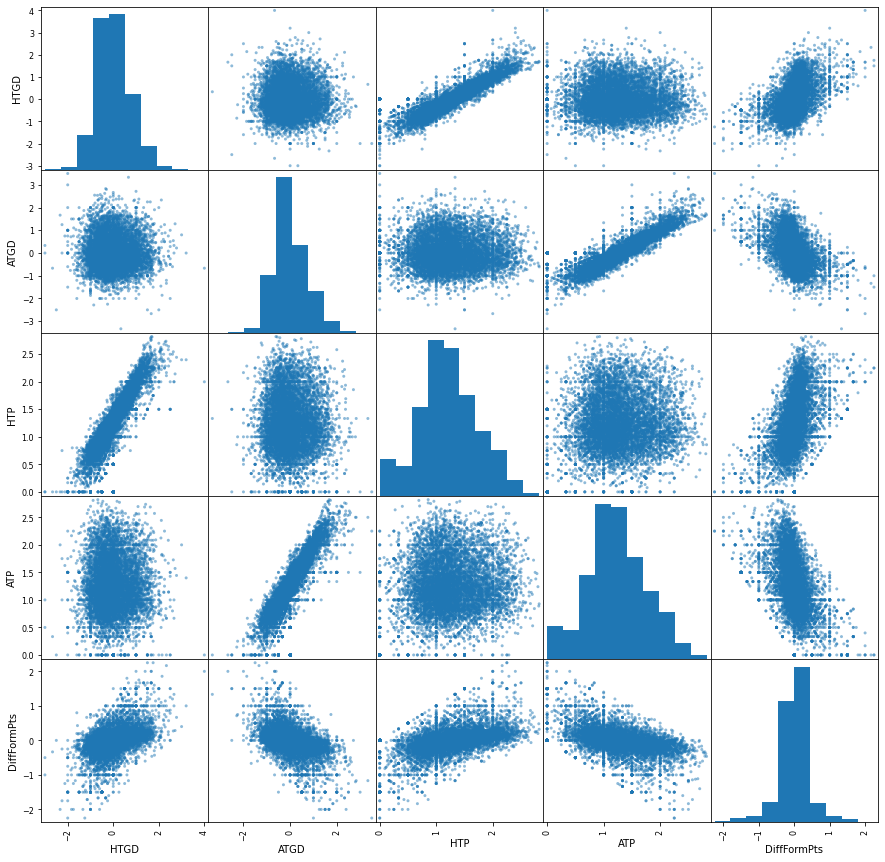

In [66]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(final_df2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [67]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = final_df2.drop(['FTR'],1)
y_all = final_df2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

C:\Users\harwi\AppData\Local\Temp/ipykernel_9508/1895490561.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_all = final_df2.drop(['FTR'],1)


In [68]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''

     # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (29 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [69]:
X_all.head(10)

,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,HM2_W,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
2824,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2825,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2826,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2827,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2828,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2829,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2830,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2831,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2832,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0
2833,-2.254382,-2.308598,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.012221,-0.018487,0.0


In [70]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

In [71]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [72]:
Y_pred = classifier.predict(X_test)

<AxesSubplot:>

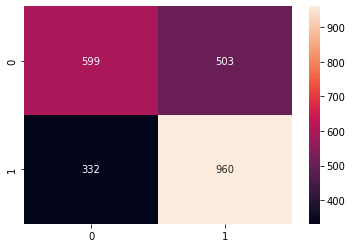

In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [74]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.54      0.59      1102
          NH       0.66      0.74      0.70      1292

    accuracy                           0.65      2394
   macro avg       0.65      0.64      0.64      2394
weighted avg       0.65      0.65      0.65      2394



In [75]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [76]:
#predicting result
Y_pred = classifier.predict(X_test)

<AxesSubplot:>

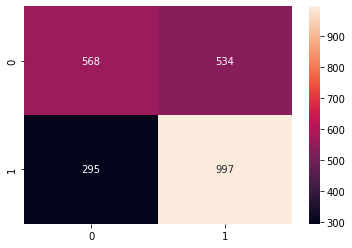

In [77]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True, fmt='d')

In [78]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.66      0.52      0.58      1102
          NH       0.65      0.77      0.71      1292

    accuracy                           0.65      2394
   macro avg       0.65      0.64      0.64      2394
weighted avg       0.65      0.65      0.65      2394



In [79]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

C:\Users\harwi\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [80]:
#predicting result
Y_pred = classifier.predict(X_test)

<AxesSubplot:>

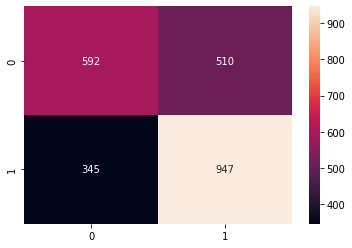

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True, fmt='d')

In [82]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.63      0.54      0.58      1102
          NH       0.65      0.73      0.69      1292

    accuracy                           0.64      2394
   macro avg       0.64      0.64      0.63      2394
weighted avg       0.64      0.64      0.64      2394



In [84]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train)

C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=82,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

<AxesSubplot:>

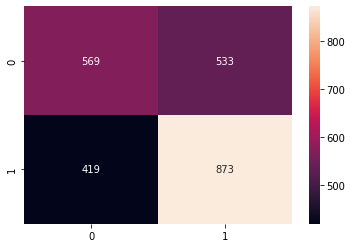

In [86]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [87]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.58      0.52      0.54      1102
          NH       0.62      0.68      0.65      1292

    accuracy                           0.60      2394
   macro avg       0.60      0.60      0.60      2394
weighted avg       0.60      0.60      0.60      2394



In [88]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    y_pred = clf.predict(features)
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print( "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\harwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=2, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
              seed=2, subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)
F1 score and accuracy score f

In [89]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train, y_train)

GaussianNB()

In [90]:
# making predictions on the testing set
y_pred = NB_Classifier.predict(X_test)

In [91]:
 # comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, Y_pred))

Gaussian Naive Bayes model accuracy(in %): 63.61737677527152
              precision    recall  f1-score   support

           H       0.58      0.52      0.54      1102
          NH       0.62      0.68      0.65      1292

    accuracy                           0.60      2394
   macro avg       0.60      0.60      0.60      2394
weighted avg       0.60      0.60      0.60      2394

